# 计算工具


## 统计函数

### 1. 百分比变化

In [6]:
ser = pd.Series(np.random.randint(1,50,8))
ser

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0    46
1     1
2    11
3    45
4    13
5     3
6    27
7    28
dtype: int64

In [7]:
ser.pct_change()

0          NaN
1    -0.978261
2    10.000000
3     3.090909
4    -0.711111
5    -0.769231
6     8.000000
7     0.037037
dtype: float64

In [13]:
df = pd.DataFrame(np.random.randint(1,50,40).reshape(10, 4))
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0,1,2,3
0,48,45,23,31
1,15,26,44,15
2,46,9,48,27
3,47,14,13,24
4,7,29,29,33
5,20,2,45,43
6,11,28,38,18
7,24,37,49,12
8,48,20,7,46
9,18,31,35,41


In [15]:
df.pct_change(axis=1)

,0,1,2,3
0,NaN,-0.062500,-0.488889,0.347826
1,NaN,0.733333,0.692308,-0.659091
2,NaN,-0.804348,4.333333,-0.437500
3,NaN,-0.702128,-0.071429,0.846154
4,NaN,3.142857,0.000000,0.137931
5,NaN,-0.900000,21.500000,-0.044444
6,NaN,1.545455,0.357143,-0.526316
7,NaN,0.541667,0.324324,-0.755102
8,NaN,-0.583333,-0.650000,5.571429
9,NaN,0.722222,0.129032,0.171429


In [16]:
df.pct_change(axis=0)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,-0.687500,-0.422222,0.913043,-0.516129
2,2.066667,-0.653846,0.090909,0.800000
3,0.021739,0.555556,-0.729167,-0.111111
4,-0.851064,1.071429,1.230769,0.375000
5,1.857143,-0.931034,0.551724,0.303030
6,-0.450000,13.000000,-0.155556,-0.581395
7,1.181818,0.321429,0.289474,-0.333333
8,1.000000,-0.459459,-0.857143,2.833333
9,-0.625000,0.550000,4.000000,-0.108696


In [18]:
df.pct_change(periods=3)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,-0.020833,-0.688889,-0.434783,-0.225806
4,-0.533333,0.115385,-0.340909,1.200000
5,-0.565217,-0.777778,-0.062500,0.592593
6,-0.765957,1.000000,1.923077,-0.250000
7,2.428571,0.275862,0.689655,-0.636364
8,1.400000,9.000000,-0.844444,0.069767
9,0.636364,0.107143,-0.078947,1.277778


### 3. 协方差(cpv)和相关系数(corr)

In [43]:
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
s1,s2

(0   -1.358484
 1    0.348086
 2   -0.604864
 3    1.374269
 4   -1.013085
 5   -0.991941
 6   -0.502953
 7    1.455782
 8    0.894725
 9    0.528353
 dtype: float64,
 0   -1.639654
 1    0.111537
 2   -0.758267
 3   -0.702385
 4   -0.894858
 5   -0.740260
 6    0.558430
 7   -0.845651
 8    0.673494
 9   -1.609765
 dtype: float64)

In [30]:
s1[3]=np.nan  # for test if auto excluding NA/null values

<IPython.core.display.Javascript object>

In [31]:
s1

0   -1.358484
1    0.348086
2   -0.604864
3         NaN
4   -1.013085
5   -0.991941
6   -0.502953
7    1.455782
8    0.894725
9    0.528353
dtype: float64

In [32]:
s1.cov(s2)

0.2368159428026959

In [33]:
pd.Series.cov(s1,s2)

<IPython.core.display.Javascript object>

0.2368159428026959

In [78]:
pd.Series.cov(df.iloc[1],df.iloc[0])   # numpy 函数依然适用于pandas数据

<IPython.core.display.Javascript object>

-0.25555555555555565

In [84]:
df = pd.DataFrame(np.random.randint(-1,4,(10,10)),index=list("一二三四五六七八九十"), columns=list('ABCDEFGHIJ'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
df

,A,B,C,D,E,F,G,H,I,J
一,1,2,-1,2,-1,-1,-1,1,0,0
二,0,1,0,3,2,0,3,1,0,0
三,1,3,3,3,2,2,0,0,2,0
四,0,-1,1,3,-1,0,1,0,2,1
五,0,3,2,1,-1,0,3,2,-1,0
六,3,0,2,2,1,1,2,-1,1,0
七,0,0,2,2,1,2,3,0,-1,1
八,3,0,2,0,3,0,3,-1,-1,1
九,1,3,3,2,1,2,1,0,1,3
十,1,2,3,0,0,2,1,3,0,-1


In [86]:
df.loc[df.index[:5],'A']=np.nan
df.loc[df.index[5:10],'B']=np.nan
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,A,B,C,D,E,F,G,H,I,J
一,NaN,2.0,-1,2,-1,-1,-1,1,0,0
二,NaN,1.0,0,3,2,0,3,1,0,0
三,NaN,3.0,3,3,2,2,0,0,2,0
四,NaN,-1.0,1,3,-1,0,1,0,2,1
五,NaN,3.0,2,1,-1,0,3,2,-1,0
六,3.0,NaN,2,2,1,1,2,-1,1,0
七,0.0,NaN,2,2,1,2,3,0,-1,1
八,3.0,NaN,2,0,3,0,3,-1,-1,1
九,1.0,NaN,3,2,1,2,1,0,1,3
十,1.0,NaN,3,0,0,2,1,3,0,-1


In [87]:
df.cov()

,A,B,C,D,E,F,G,H,I,J
A,1.80,NaN,-0.300000,-0.400000,0.850000,-1.050000,0.250000,-1.150000,0.250000,-0.350000
B,NaN,2.80,1.000000,-0.800000,0.600000,0.600000,-0.150000,0.650000,-0.950000,-0.650000
C,-0.30,1.00,1.788889,-0.511111,0.566667,1.266667,0.311111,-0.055556,0.211111,0.277778
D,-0.40,-0.80,-0.511111,1.288889,-0.066667,-0.044444,-0.422222,-0.444444,0.844444,0.222222
E,0.85,0.60,0.566667,-0.066667,2.011111,0.488889,0.755556,-0.944444,-0.122222,0.277778
F,-1.05,0.60,1.266667,-0.044444,0.488889,1.288889,0.022222,0.000000,0.288889,0.222222
G,0.25,-0.15,0.311111,-0.422222,0.755556,0.022222,2.044444,-0.222222,-0.977778,0.111111
H,-1.15,0.65,-0.055556,-0.444444,-0.944444,0.000000,-0.222222,1.611111,-0.388889,-0.722222
I,0.25,-0.95,0.211111,0.844444,-0.122222,0.288889,-0.977778,-0.388889,1.344444,0.166667
J,-0.35,-0.65,0.277778,0.222222,0.277778,0.222222,0.111111,-0.722222,0.166667,1.166667


In [88]:
df.corr()

,A,B,C,D,E,F,G,H,I,J
A,1.000000,NaN,-0.408248,-0.272166,0.578352,-0.875000,0.186339,-0.521651,0.186339,-0.175882
B,NaN,1.000000,0.377964,-0.534522,0.218218,0.327327,-0.050111,0.464286,-0.423164,-0.868599
C,-0.408248,0.377964,1.000000,-0.336601,0.298757,0.834186,0.162681,-0.032725,0.136128,0.192279
D,-0.272166,-0.534522,-0.336601,1.000000,-0.041408,-0.034483,-0.260103,-0.308423,0.641493,0.181220
E,0.578352,0.218218,0.298757,-0.041408,1.000000,0.303658,0.372615,-0.524681,-0.074329,0.181345
F,-0.875000,0.327327,0.834186,-0.034483,0.303658,1.000000,0.013690,0.000000,0.219458,0.181220
G,0.186339,-0.050111,0.162681,-0.260103,0.372615,0.013690,1.000000,-0.122444,-0.589768,0.071944
H,-0.521651,0.464286,-0.032725,-0.308423,-0.524681,0.000000,-0.122444,1.000000,-0.264236,-0.526787
I,0.186339,-0.423164,0.136128,0.641493,-0.074329,0.219458,-0.589768,-0.264236,1.000000,0.133077
J,-0.175882,-0.868599,0.192279,0.181220,0.181345,0.181220,0.071944,-0.526787,0.133077,1.000000


### 4. method corrwith() 

In [91]:
index = ['a', 'b', 'c', 'd', 'e']
columns = ['one', 'two', 'three', 'four']
df1 = pd.DataFrame(np.random.randn(5, 4), index=index, columns=columns)
df2 = pd.DataFrame(np.random.randn(4, 4), index=index[:4], columns=columns)
df1,df2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(        one       two     three      four
 a  1.193123  1.177540  0.609192 -0.393946
 b  1.807133 -0.932693 -0.268726  0.678354
 c  0.434365  0.368568 -0.034742 -0.474880
 d -0.162592  1.735813  0.186273  3.493731
 e -1.226674 -0.411514  0.757383 -0.165028,
         one       two     three      four
 a -1.818752 -0.252515  0.465518 -0.120808
 b -0.442728 -0.662163  1.858389 -1.271086
 c -0.582437 -0.263963 -0.602294  1.401731
 d -0.598379  0.671178 -0.432421 -0.409091)

In [90]:
df1.corrwith(df2)

one     -0.130733
two      0.917221
three   -0.371878
four    -0.177416
dtype: float64

### 5. 排名

In [102]:
s = pd.Series(np.random.randint(1,5,5), index=list('abcde'))
s

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

a    1
b    3
c    4
d    3
e    2
dtype: int64

In [103]:
s.rank()

a    1.0
b    3.5
c    5.0
d    3.5
e    2.0
dtype: float64

In [96]:
s.rank(ascending=False,)

a    2.0
b    1.0
c    3.0
d    5.0
e    4.0
dtype: float64

In [109]:
df.rank(method='min',axis=1)

,A,B,C,D,E,F,G,H,I,J
一,NaN,8.0,1.0,8.0,1.0,1.0,1.0,7.0,5.0,5.0
二,NaN,5.0,1.0,8.0,7.0,1.0,8.0,5.0,1.0,1.0
三,NaN,7.0,7.0,7.0,4.0,4.0,1.0,1.0,4.0,1.0
四,NaN,1.0,5.0,9.0,1.0,3.0,5.0,3.0,8.0,5.0
五,NaN,8.0,6.0,5.0,1.0,3.0,8.0,6.0,1.0,3.0
六,9.0,NaN,6.0,6.0,3.0,3.0,6.0,1.0,3.0,2.0
七,2.0,NaN,6.0,6.0,4.0,6.0,9.0,2.0,1.0,4.0
八,7.0,NaN,6.0,3.0,7.0,3.0,7.0,1.0,1.0,5.0
九,2.0,NaN,8.0,6.0,2.0,6.0,2.0,1.0,2.0,8.0
十,5.0,NaN,8.0,2.0,2.0,7.0,5.0,8.0,2.0,1.0


## 窗口功能

In [112]:
s = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2020',periods=100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
s = s.cumsum()

In [120]:
r = s.rolling(window=5)

In [121]:
r.mean()

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05    1.411653
                ...   
2020-04-05   -6.298621
2020-04-06   -7.048510
2020-04-07   -7.735802
2020-04-08   -8.107106
2020-04-09   -8.532488
Freq: D, Length: 100, dtype: float64

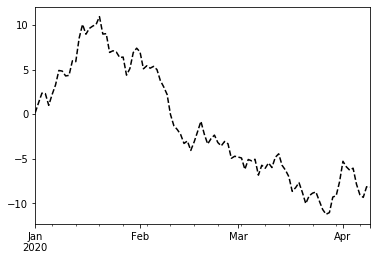

In [122]:
s.plot(style='k--')

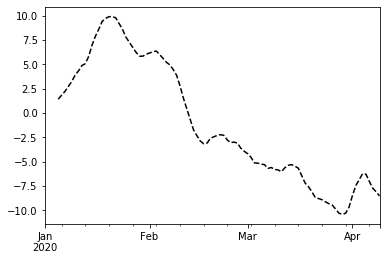

In [123]:
r.mean().plot(style='k--')

In [129]:
s.rolling(20,min_periods=5).sum().head(50)

2020-01-01           NaN
2020-01-02           NaN
2020-01-03           NaN
2020-01-04           NaN
2020-01-05      7.058267
2020-01-06      9.249275
2020-01-07     12.501584
2020-01-08     17.397829
2020-01-09     22.223167
2020-01-10     26.503565
2020-01-11     30.850167
2020-01-12     36.826203
2020-01-13     42.712290
2020-01-14     51.246328
2020-01-15     61.319693
2020-01-16     70.286839
2020-01-17     79.898253
2020-01-18     89.776286
2020-01-19     99.833784
2020-01-20    110.774809
2020-01-21    119.605178
2020-01-22    127.355415
2020-01-23    131.923621
2020-01-24    136.738304
2020-01-25    142.717537
2020-01-26    146.870927
2020-01-27    150.019782
2020-01-28    149.492251
2020-01-29    149.771890
2020-01-30    152.401615
2020-01-31    155.452751
2020-02-01    156.448392
2020-02-02    155.645496
2020-02-03    152.533402
2020-02-04    147.612392
2020-02-05    143.999997
2020-02-06    139.384489
2020-02-07    133.273523
2020-02-08    126.268012
2020-02-09    117.530179
